# World Happiness Report 2017 | Exploratory Data Analysis


## Context

The dataset used in this exploratory data analysis is from the 2017 World Happiness Report published by the United Nations Sustainable Development Solutions Network. This data was collected by the Gallup World Poll, using a set of surveys from more than 160 countries in over 140 languages. The surveys aim to analyze data from hundreds of thousands of individuals and investigate the ways in which elements of people’s working lives drive their wellbeing.

Each country is given a happiness score that is the sum of scores from the following 7 criteria:

* GDP per capita
* healthy years of life expectancy, social support (as measured by having someone to count on in times of trouble),
* trust (as measured by a perceived absence of corruption in government and business)
* perceived freedom to make life decisions
* generosity (as measured by recent donations)
* dystopia (benchmark country corresponding to the lowest possible values in each of the criteria)

The countries are then ranked from most happy to least happy.


## A. Importing, cleaning and numerical summaries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data sets

In [2]:
# Import the data as pandas DataFrame
df = pd.read_csv('data.csv')

### Get some structural information

In [3]:
# Check the number of observations
print('Number of observations: {}'.format(df.shape[0]))

# Obtain the column headings
print('\nColumn headings:')
print(df.columns)

# Check the data type for each column
print('\nData types:')
print(df.dtypes)

Number of observations: 153

Column headings:
Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

Data types:
Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object


### Check for missing data

In [4]:
# Check if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


We see immediatly that there are two missing values in the Job Satisfaction column.  
Anyway, I want to see all observations with missing values in any columns 

In [5]:
# Show the obsevations that contain at least one missing values
df[df.isnull().sum(axis=1) > 0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
59,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
144,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


The job satisfaction is an additionnal information and is not part of the happiness score calculation. Dropping these observations sounds not a good idea for the moment, without more idea about the next steps of the analysis... 

To satisfy the exercice tasks, i will do the two following things:
- remove these observations and store the result in a separate DataFrame `df_clean`
- replace the job satisfaction NaN values by the mean of the non-missing values in the original data set 

In [6]:
# Remove any observations to ensure that there are no missing values
df_clean = df.dropna()

print('Number of observations in the cleaned DataFrame: {}'.format(df_clean.shape[0]))  # should be 151
print('Job Satisfaction mean = {}'.format(df_clean['Job Satisfaction'].mean()))

Number of observations in the cleaned DataFrame: 151
Job Satisfaction mean = 75.20993377483444


In [7]:
# Replace the Job Satisfaction missing values with the value of the mean of the non-missing values
df['Job Satisfaction'].fillna(value=df_clean['Job Satisfaction'].mean(), inplace=True)

print('Number of observations in the original DataFrame: {}'.format(df.shape[0]))  # should be 153
print('Job Satisfaction mean = {}'.format(df['Job Satisfaction'].mean()))          # should be the same than above

Number of observations in the original DataFrame: 153
Job Satisfaction mean = 75.20993377483443


### Get summaries of the data

In [8]:
# Obtain the mean, minimum and maximum value for each column containing numerical data
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.876804
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,69.300000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.000000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


**Remark:**  
The happiness rank maximum value is 155, it should be 153. There are some holes and maybe mistakes in this computed column.  
We should investigate about the derived computed columns and fix them if necessary...

### Fixing and sorting the data

Happiness Rank and Happiness Score columns needs some investigation

In [9]:
# Get the count of distinct values
print('# Distinct Happiness scores = {}'.format(df['Happiness Score'].unique().shape[0]))
print('# Distinct Happiness ranks  = {}'.format(df['Happiness Rank'].unique().shape[0]))

# Distinct Happiness scores = 149
# Distinct Happiness ranks  = 153


**Remark:**  
The probability to have countries with the same happiness score is very low. It's a rounding error and it can induce ranking errors. 

**Note:**  
By quickly looking at the data, we can see that Sweden and Australia have the same Happiness Score.  
Sweden is ranked first but it should be Australia in fact

So, we need to recompute the happiness score and the rank :

In [10]:
# Recompute the happiness score
df['Happiness Score'] = df.loc[:, 'Economy':'Dystopia'].sum(axis=1)

# Order the data set by descending happiness score
df.sort_values('Happiness Score', ascending=False, inplace=True)

# Set the Happiness Rank 
df['Happiness Rank'] = np.arange(1, df.shape[0] + 1)

In [11]:
# Replace the index by the Happiness Rank
df.set_index('Happiness Rank', inplace=True)

In [12]:
print('# Distinct Happiness scores = {}'.format(df['Happiness Score'].unique().shape[0]))  # should be 153 now

# Distinct Happiness scores = 153


In [13]:
# (again) Obtain the mean, minimum and maximum value for each column containing numerical data
df.describe()

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.349245,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,1.135013,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.876804
min,2.693061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,4.496820,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,69.300000
50%,5.279022,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,6.097535,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.000000
max,7.537079,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [14]:
# List the 10 happiest countries
df.head(10)

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
1,Norway,7.537079,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
2,Denmark,7.521835,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
3,Iceland,7.503704,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
4,Switzerland,7.494366,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
5,Finland,7.469203,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
6,Netherlands,7.376920,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
7,Canada,7.316388,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
8,New Zealand,7.314001,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
9,Australia,7.284045,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [15]:
# List the 10 least happy countries
df.tail(10)

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
144,Yemen,3.593104,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.900000,Asia-Pacific
145,South Sudan,3.591152,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,75.209934,Africa
146,Liberia,3.532743,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.600000,Africa
147,Guinea,3.506576,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.100000,Africa
148,Togo,3.494649,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.800000,Africa
149,Rwanda,3.470759,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.700000,Africa
150,Syria,3.461913,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.700000,Asia-Pacific
151,Tanzania,3.349075,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.800000,Africa
152,Burundi,2.904535,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.300000,Africa


**Note:**  
If we dropped the observations with missing values, the South Sudan would not be in this list, and Haiti would be.

## B. Indexing and grouping


### Preparing and fixing the data
We want to analyse the data by regions. First of all, it sounds a good idea to look at the different regions existing in the data set.

In [16]:
# Get some details about the different regions 
df['Region'].unique()

array(['Western Europe', 'North America', 'Asia-Pacific', 'Latin America',
       'Eastern Europe', 'Africa', 'Europe'], dtype=object)

**Remark**  
Europe is splitted in three regions, it looks weird. Need some investigation...

In [17]:
# Show the countries associated with the region Europe
df[df['Region'] == 'Europe']

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
130,Ukraine,4.095541,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


In [18]:
# Ukraine should be in Eastern Europe, fix it
df.loc[df['Region'] == 'Europe', 'Region'] = 'Eastern Europe'
df['Region'].unique()

array(['Western Europe', 'North America', 'Asia-Pacific', 'Latin America',
       'Eastern Europe', 'Africa'], dtype=object)

### Happiness Score by Region analysis

In [19]:
# Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions
grouped = df.groupby('Region')

In [20]:
# Compute the mean happiness score for each region and rank the regions from most happy to least happy
grouped['Happiness Score'] \
    .mean() \
    .sort_values(ascending=False) \
    .rename('Mean of happiness score')

Region
North America     7.154463
Western Europe    6.880408
Latin America     5.957756
Eastern Europe    5.451511
Asia-Pacific      5.358284
Africa            4.239461
Name: Mean of happiness score, dtype: float64

In [21]:
# Compute the number of countries in each region that have a happiness score above 6.0
grouped.apply(lambda df: df[df['Happiness Score'] > 6.0].shape[0]) \
    .sort_values(ascending=False) \
    .rename('Number of countries having happiness scores > 6.0')

Region
Western Europe    17
Latin America     13
Asia-Pacific      11
North America      2
Eastern Europe     1
Africa             0
Name: Number of countries having happiness scores > 6.0, dtype: int64

In [22]:
# Compute the difference between the maximum and minimum happiness score for each region. 
# Which region has the largest range of happiness scores?
def compute_range(group):
    return group.max() - group.min()

grouped['Happiness Score']  \
    .agg([min, max, compute_range]) \
    .rename(columns={'min': 'Happiness Score min', 'max': 'Happiness Score max', 'compute_range': 'Happiness Score range'}) \
    .sort_values('Happiness Score range', ascending=False)

,Happiness Score min,Happiness Score max,Happiness Score range
Region,,,
Asia-Pacific,3.461913,7.314001,3.852088
Latin America,3.602995,7.079110,3.476115
Africa,2.693061,5.872139,3.179078
Western Europe,5.195182,7.537079,2.341897
Eastern Europe,4.095541,6.097535,2.001994
North America,6.992538,7.316388,0.323850


**Answer:** Asia-Pacific region has the largest range of happiness scores

## C. Bar plot of the Happiness Score

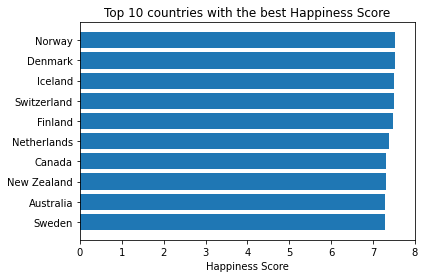

In [23]:
# Obtain a horizontal bar plot of the Happiness Score of the top 10 countries
plt.barh(df.index[0:10], df[0:10]['Happiness Score'])
plt.gca().invert_yaxis()

plt.yticks(df.index[0:10], df.Country[0:10])
plt.xlim(0, 8)
plt.xlabel('Happiness Score')
plt.title('Top 10 countries with the best Happiness Score')
plt.show()

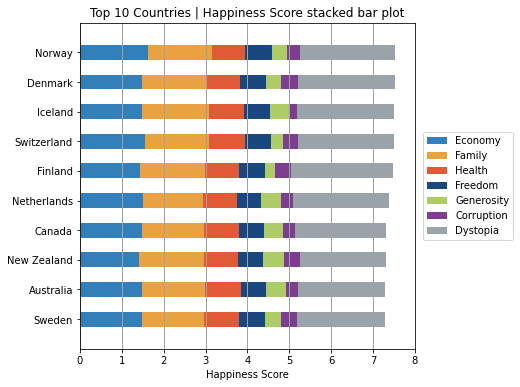

In [24]:
# Obtain a horizontal stacked bar chart where the overall happiness score is divided into the seven parts.
# Show the top 10 coutries with the best Happiness Score

def plot_happiness_score_stacked_barh(df, title, xsize=6, ysize=6):
    colors = ['#337FBA', '#E9A241', '#E05A35', '#18487F', '#ADCB67', '#7E3E8F', '#9AA3A9']
    labels = df.columns[2:9]

    left = 0
    x_num = np.arange(1, df.shape[0] + 1)
    for i in range(7):
        plt.barh(x_num, df[labels[i]], left=left, color=colors[i], label=labels[i], height=0.5)
        left += df[labels[i]]

    plt.grid(True, axis='x', linewidth=1, color='#A1A1A1')
    plt.xlim(0, 8)
    plt.xlabel('Happiness Score')    
    
    plt.ylim(df.shape[0] + 1, 0)
    plt.yticks(x_num, df.Country)
    
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
    plt.gcf().set_size_inches(xsize, ysize)
    plt.show()
    
plot_happiness_score_stacked_barh(df[0:10], title='Top 10 Countries | Happiness Score stacked bar plot')

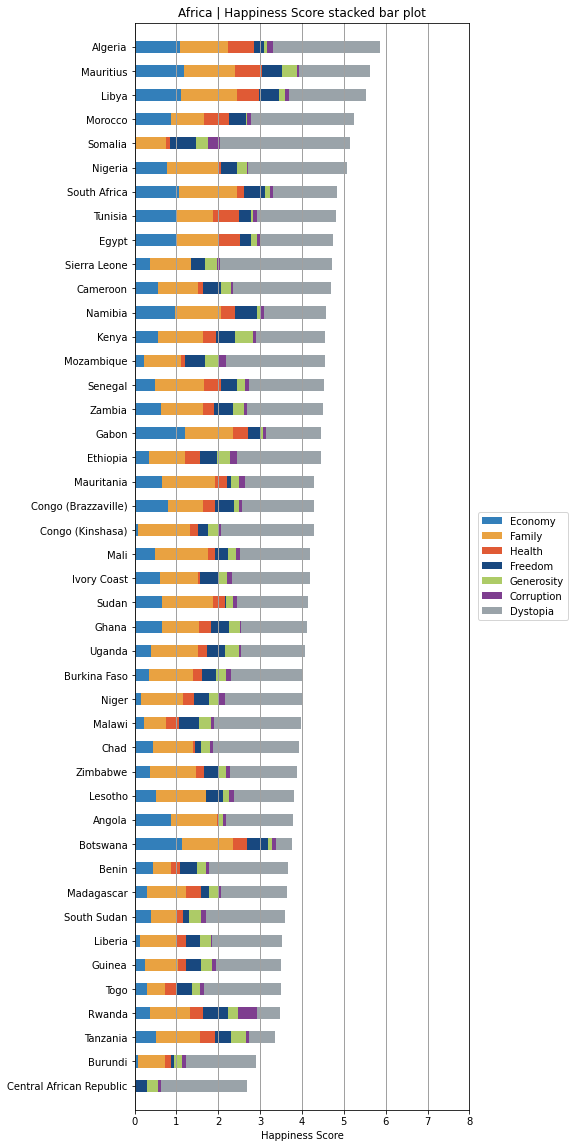

In [25]:
# Obtain the same stacked horizontal bar chart as in step 2 but from the region Africa
plot_happiness_score_stacked_barh(grouped.get_group('Africa'), \
                                  title='Africa | Happiness Score stacked bar plot', \
                                  xsize=6, \
                                  ysize=20)

## D. Histogram of Job Satisfaction

**Note**:  
Remember the two countries with missing values in the Job Satisfaction feature:
- North Ciprius
- South Sudan

I will use the data set in which I removed them `df_clean`

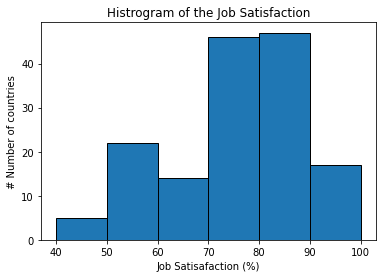

In [26]:
# Obtain a histogram of the Job Satisfaction with the predefined categories
plt.hist(df_clean['Job Satisfaction'], bins=[40, 50, 60, 70, 80, 90, 100], edgecolor='black')
plt.xlabel('Job Satisafaction (%)')
plt.ylabel('# Number of countries')
plt.title('Histrogram of the Job Satisfaction')
plt.show()

## E. Pairwise Scatter plots

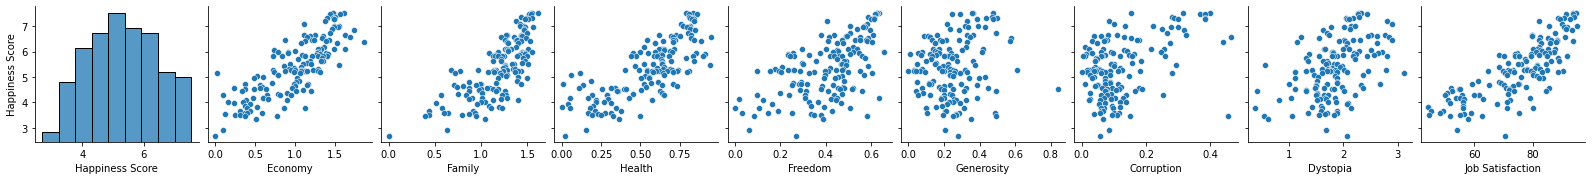

In [27]:
# 1. Obtain scatter plots of the Happiness Score versus each of the other variables
sns.pairplot(df, kind='scatter', x_vars=df.columns[1:10], y_vars=['Happiness Score'])
plt.show()

## F. Correlation

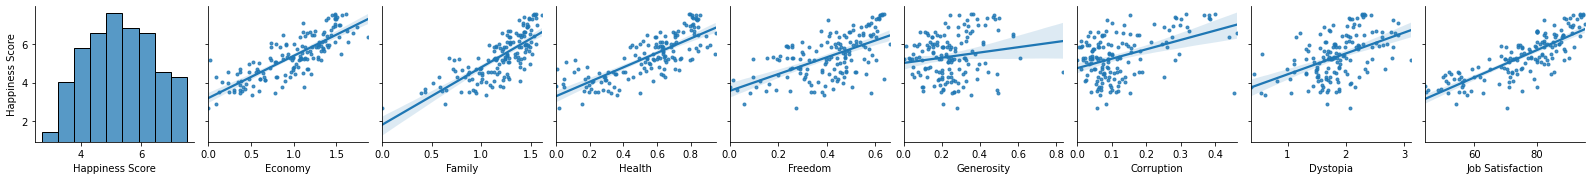

In [28]:
sns.pairplot(df, kind='reg', x_vars=df.columns[1:10], y_vars=['Happiness Score'], markers='.')
plt.show()

In [29]:
# Compute the correlation matrix 
df.corr().loc['Happiness Score', 'Economy':'Job Satisfaction'] \
    .rename('Correlation') \
    .sort_values(ascending=False)

Economy             0.811184
Job Satisfaction    0.805971
Health              0.780489
Family              0.753819
Freedom             0.576027
Dystopia            0.474313
Corruption          0.435862
Generosity          0.159993
Name: Correlation, dtype: float64

**The Happiness Score is mainly positively correlated with the Economy, Health and Family.**  
**Note that the Job Satisfaction is also positively correlated with the Happiness score**

**Remark:** The Job Satisfaction is drawn here as the independent variable. It seems more reasonable to think that the job satisfaction is a consequence of the happiness score (that is the sum of the other variables) and so, should be drawn as the dependant variable.

## G. Probabilities

We want to compute the probability that a randomly selected country with Happiness score over 6.0 is from Western Europe :

Let $A$ and $B$ be the events

$A = \{countries\space from\space Western\space Europe\}$  
$B = \{countries\space with\space happiness\space score > 6.0\}$  

We want to compute the conditional probability $P(A|B)$  

and we know that  
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

From the Discrete Uniform Probability Law, we know that if the sample space consists of $n$ possible outcomes which are equally likely, then the probability of any event A is given by
$$P(A) = \frac{number\space of\space outcomes\space of\space A}{n}$$

So, we need to know three things to compute our probability:

- the number of countries
- the number of countries having a happiness score > 6.0
- the number of countries from Western Europe and having a happiness score > 6.0

In [30]:
# Number of countries
n = df.shape[0]
print('Number of countries = {}'.format(n))

# Number of countries having a happiness score > 6.0
n_with_greater_score = len(df[df['Happiness Score'] > 6.0])
print('Number of countries having a happiness score > 6.0 = {}'.format(n_with_greater_score))

# Number of countries from Western Europe
filter = (df['Region'] == 'Western Europe') & (df['Happiness Score'] > 6.0)
n_from_western_europe_and_great_score = len(df[filter])
print('Number of countries from Western Europe and having a happiness score > 6.0 = {}'.format(n_from_western_europe_and_great_score))

Number of countries = 153
Number of countries having a happiness score > 6.0 = 44
Number of countries from Western Europe and having a happiness score > 6.0 = 17


In [31]:
# compute the answer
P_B = n_with_greater_score / n
P_A_intersect_B = n_from_western_europe_and_great_score / n

P_A_given_B = P_A_intersect_B / P_B
print('P(A|B) = {}'.format(P_A_given_B))

P(A|B) = 0.38636363636363635


**Answer:**  
The probability that a randomly selected country with Happiness score over 6.0 is from Western Europe is 38.6%

## G. Matrices

Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1
values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [32]:
# Create a derived column for the mapping of the regions
df['Region Nb'] = df['Region'].map({ \
    'Africa': 0, \
    'Asia-Pacific': 1, \
    'Eastern Europe': 2, \
    'Latin America': 3, \
    'North America': 4, \
    'Western Europe': 5})

In [33]:
n_region  = len(df.Region.unique())
n_country = df.shape[0]

result = np.full((n_country, n_region), fill_value=0)
for i in range(n_country):
    j = df.iloc[i, 11]
    result[i, j] = 1
    
result

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 

In [34]:
# Easier alternative
result = pd.get_dummies(df.Region).values
result


array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 